# Code du projet

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import treatment
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Fonctions aide

In [2]:
def adjacent(cell, size=None): #size = [nlines, ncolumns] pour éviter de renvoyer des cellules hors labyrinthe
    if size==None:
        return [
            (cell[0]-1, cell[1]  ),
            (cell[0]  , cell[1]-1),
            (cell[0]+1, cell[1]  ),
            (cell[0]  , cell[1]+1)
        ]
    return [adj for adj in adjacent(cell) if (adj[0]>=0 and adj[0]<size[0] and adj[1]>=0 and adj[1]<size[1])]

In [3]:
def get_wall(c1, c2, height):
    """
    Revoie les coordonnées du mur entre les cases c1 et c2 d'un labyrinthe
    """
    if c1[0] == c2[0]: #Mur vertical
        x1 = int( (c1[1]+c2[1]+1)/2 )
        x2 = x1
        y1 = int( height - c1[0] )
        y2 = y1 - 1
        return ((x1, x2), (y1, y2))

    if c1[1] == c2[1]: #Mur horizontal
        x1 = int( c1[1] )
        x2 = x1 + 1
        y1 = int( height - (c1[0]+c2[0]+1)/2 )
        y2 = y1
        return ((x1, x2), (y1, y2))

In [4]:
def show_lab(ax, lab):
    """
    Affiche un labyrinthe lab donné dans un plote matplotlib
    """
    walls = []
    for key in [k for k in lab.keys() if type(k)!=type(' ')]:
        for cell in adjacent(key):
            if cell not in lab[key]:
                walls.append(get_wall(cell, key, lab["nlines"]))
    for wall in walls:
        ax.plot(wall[0], wall[1])
    return ax

## Exemples d'execution des fonctions

In [5]:
#Exemple de structure de donnée représentant un labyrinthe
lab_c = {
    "nlines"  :3,
    "ncolumns":4,
    (0,0):[(1,0)      ], (0,1):[(1,1),(0,2)], (0,2):[(0,1),(0,3)], (0,3):[(0,2),(1,3)       ],
    (1,0):[(0,0),(2,0)], (1,1):[(0,1),(1,2)], (1,2):[(1,1),(1,3)], (1,3):[(1,2),(0,3), (2,3)],
    (2,0):[(1,0),(2,1)], (2,1):[(2,0),(2,2)], (2,2):[(2,1),(2,3)], (2,3):[(2,2),(1,3)       ]
}

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

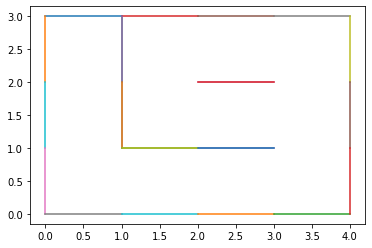

In [9]:
show_lab(plt, lab_c)

In [7]:
def show_graph(ax,lab):
	lines = []
	rows = lab["nlines"]
	cols = lab["ncolumns"]
	for node, edges in lab.items():
		if type(node)==str:
			continue

		nodx = rows - node[0] -0.5
		nody = node[1]+0.5
		ax.scatter([nody],[nodx], marker=".", s=100, color = "black")
		for edge in edges:
			nodeadjx = rows - edge[0] - 0.5
			nodeadjy = edge[1] + 0.5
			ax.plot([nody, nodeadjy],[nodx, nodeadjx], color="black")
	
	return ax

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

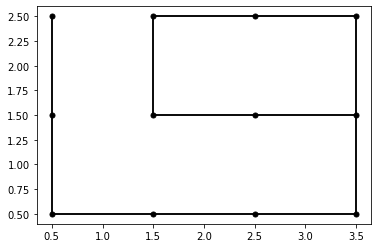

In [8]:
show_graph(plt, lab_c)

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

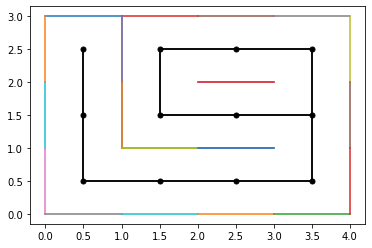

In [9]:
show_lab(plt, lab_c)
show_graph(plt, lab_c)

In [10]:
treatment.nb_murs(lab_c)

5

## Cas du 2x2
### Pseudo-Labyrinthes

In [11]:
L_2x2 = treatment.generate_pseudo_lab(2,2)
L = L_2x2
print(len(L))
L[0]

16


{'ncolumns': 2,
 'nlines': 2,
 (0, 0): [(1, 0), (0, 1)],
 (0, 1): [(0, 0), (1, 1)],
 (1, 0): [(0, 0), (1, 1)],
 (1, 1): [(0, 1), (1, 0)]}

C:\Users\User\AppData\Local\Temp\ipykernel_8572\3588687045.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


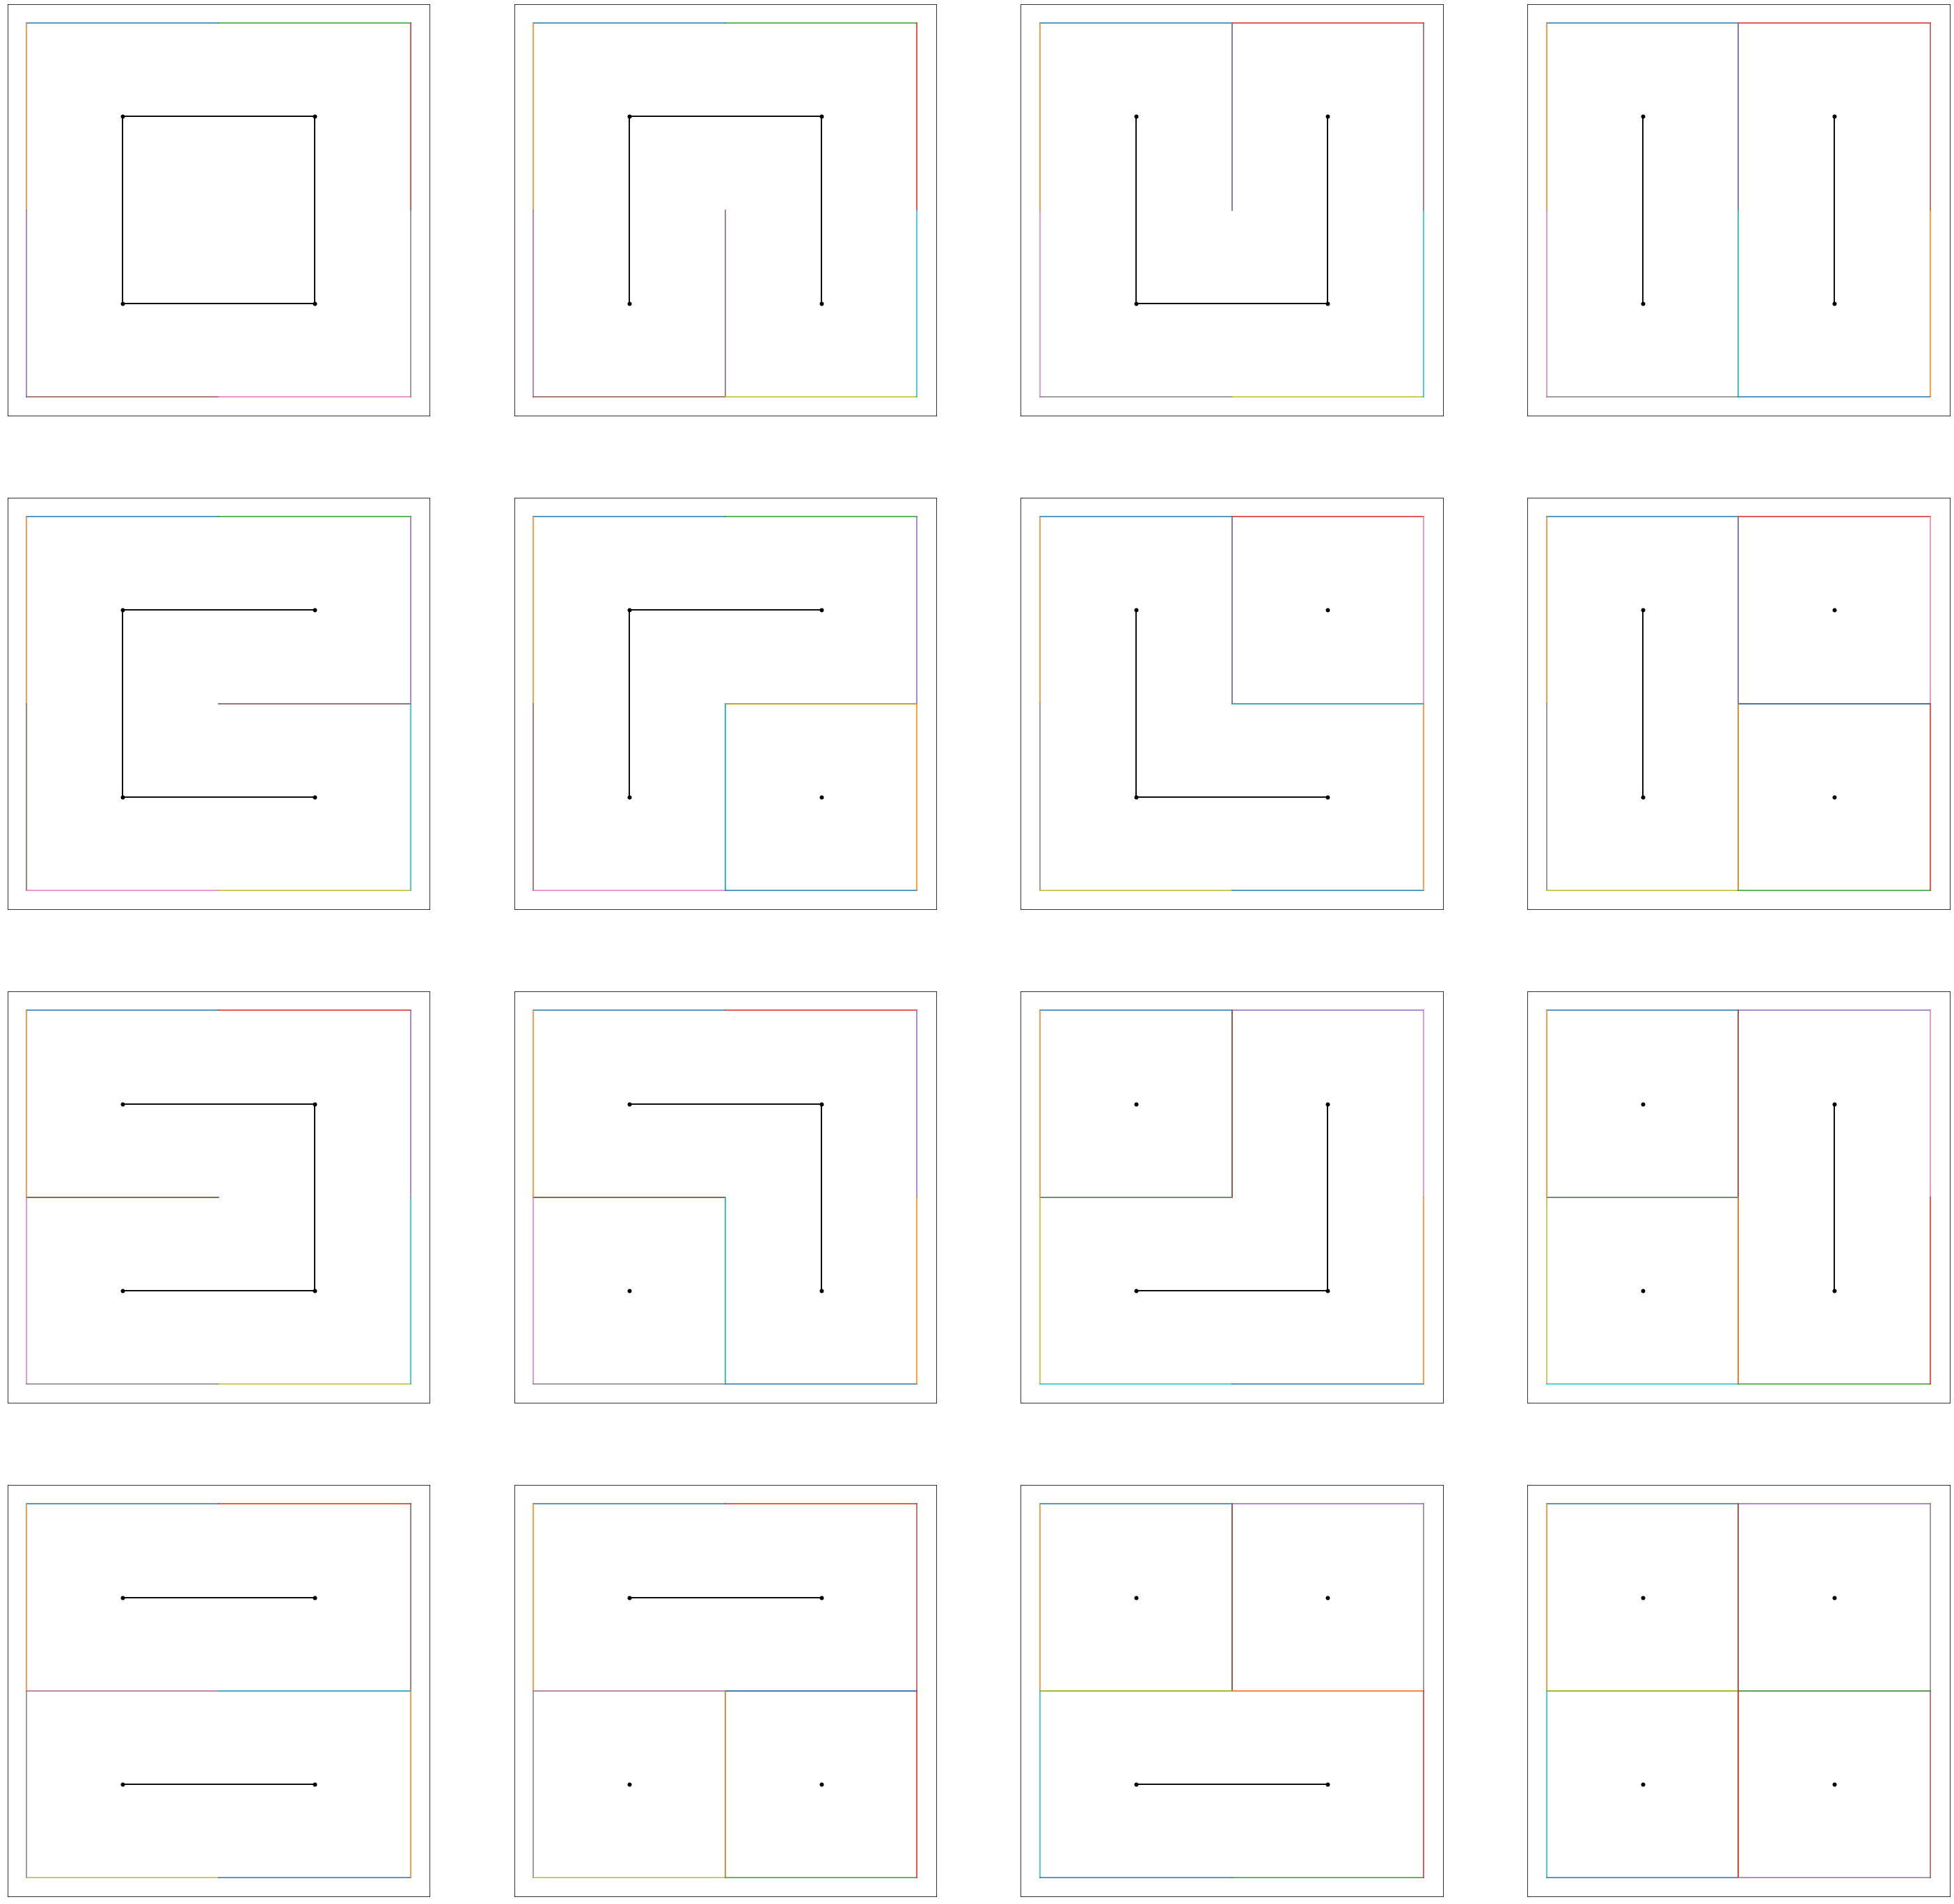

In [12]:
cols = 4
rows = len(L)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(L)):
            break
        else:
            show_lab(axs[i,n], L[cols*i+n])
            #show_graph(axs[i,n], L[cols*i+n])
            continue
        break
fig.savefig("data/2x2/Total.png", dpi=200)
fig.show()

In [13]:
for i in range(len(L)):
    plt.clf()
    show_lab(plt,L[i])
    show_graph(plt, L[i])
    plt.xticks([])
    plt.yticks([])
    plt.savefig("data/2x2/{}.png".format(i),dpi=50)
plt.clf()

<Figure size 432x288 with 0 Axes>

### Labyrinthes

C:\Users\User\AppData\Local\Temp\ipykernel_8572\2308305690.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


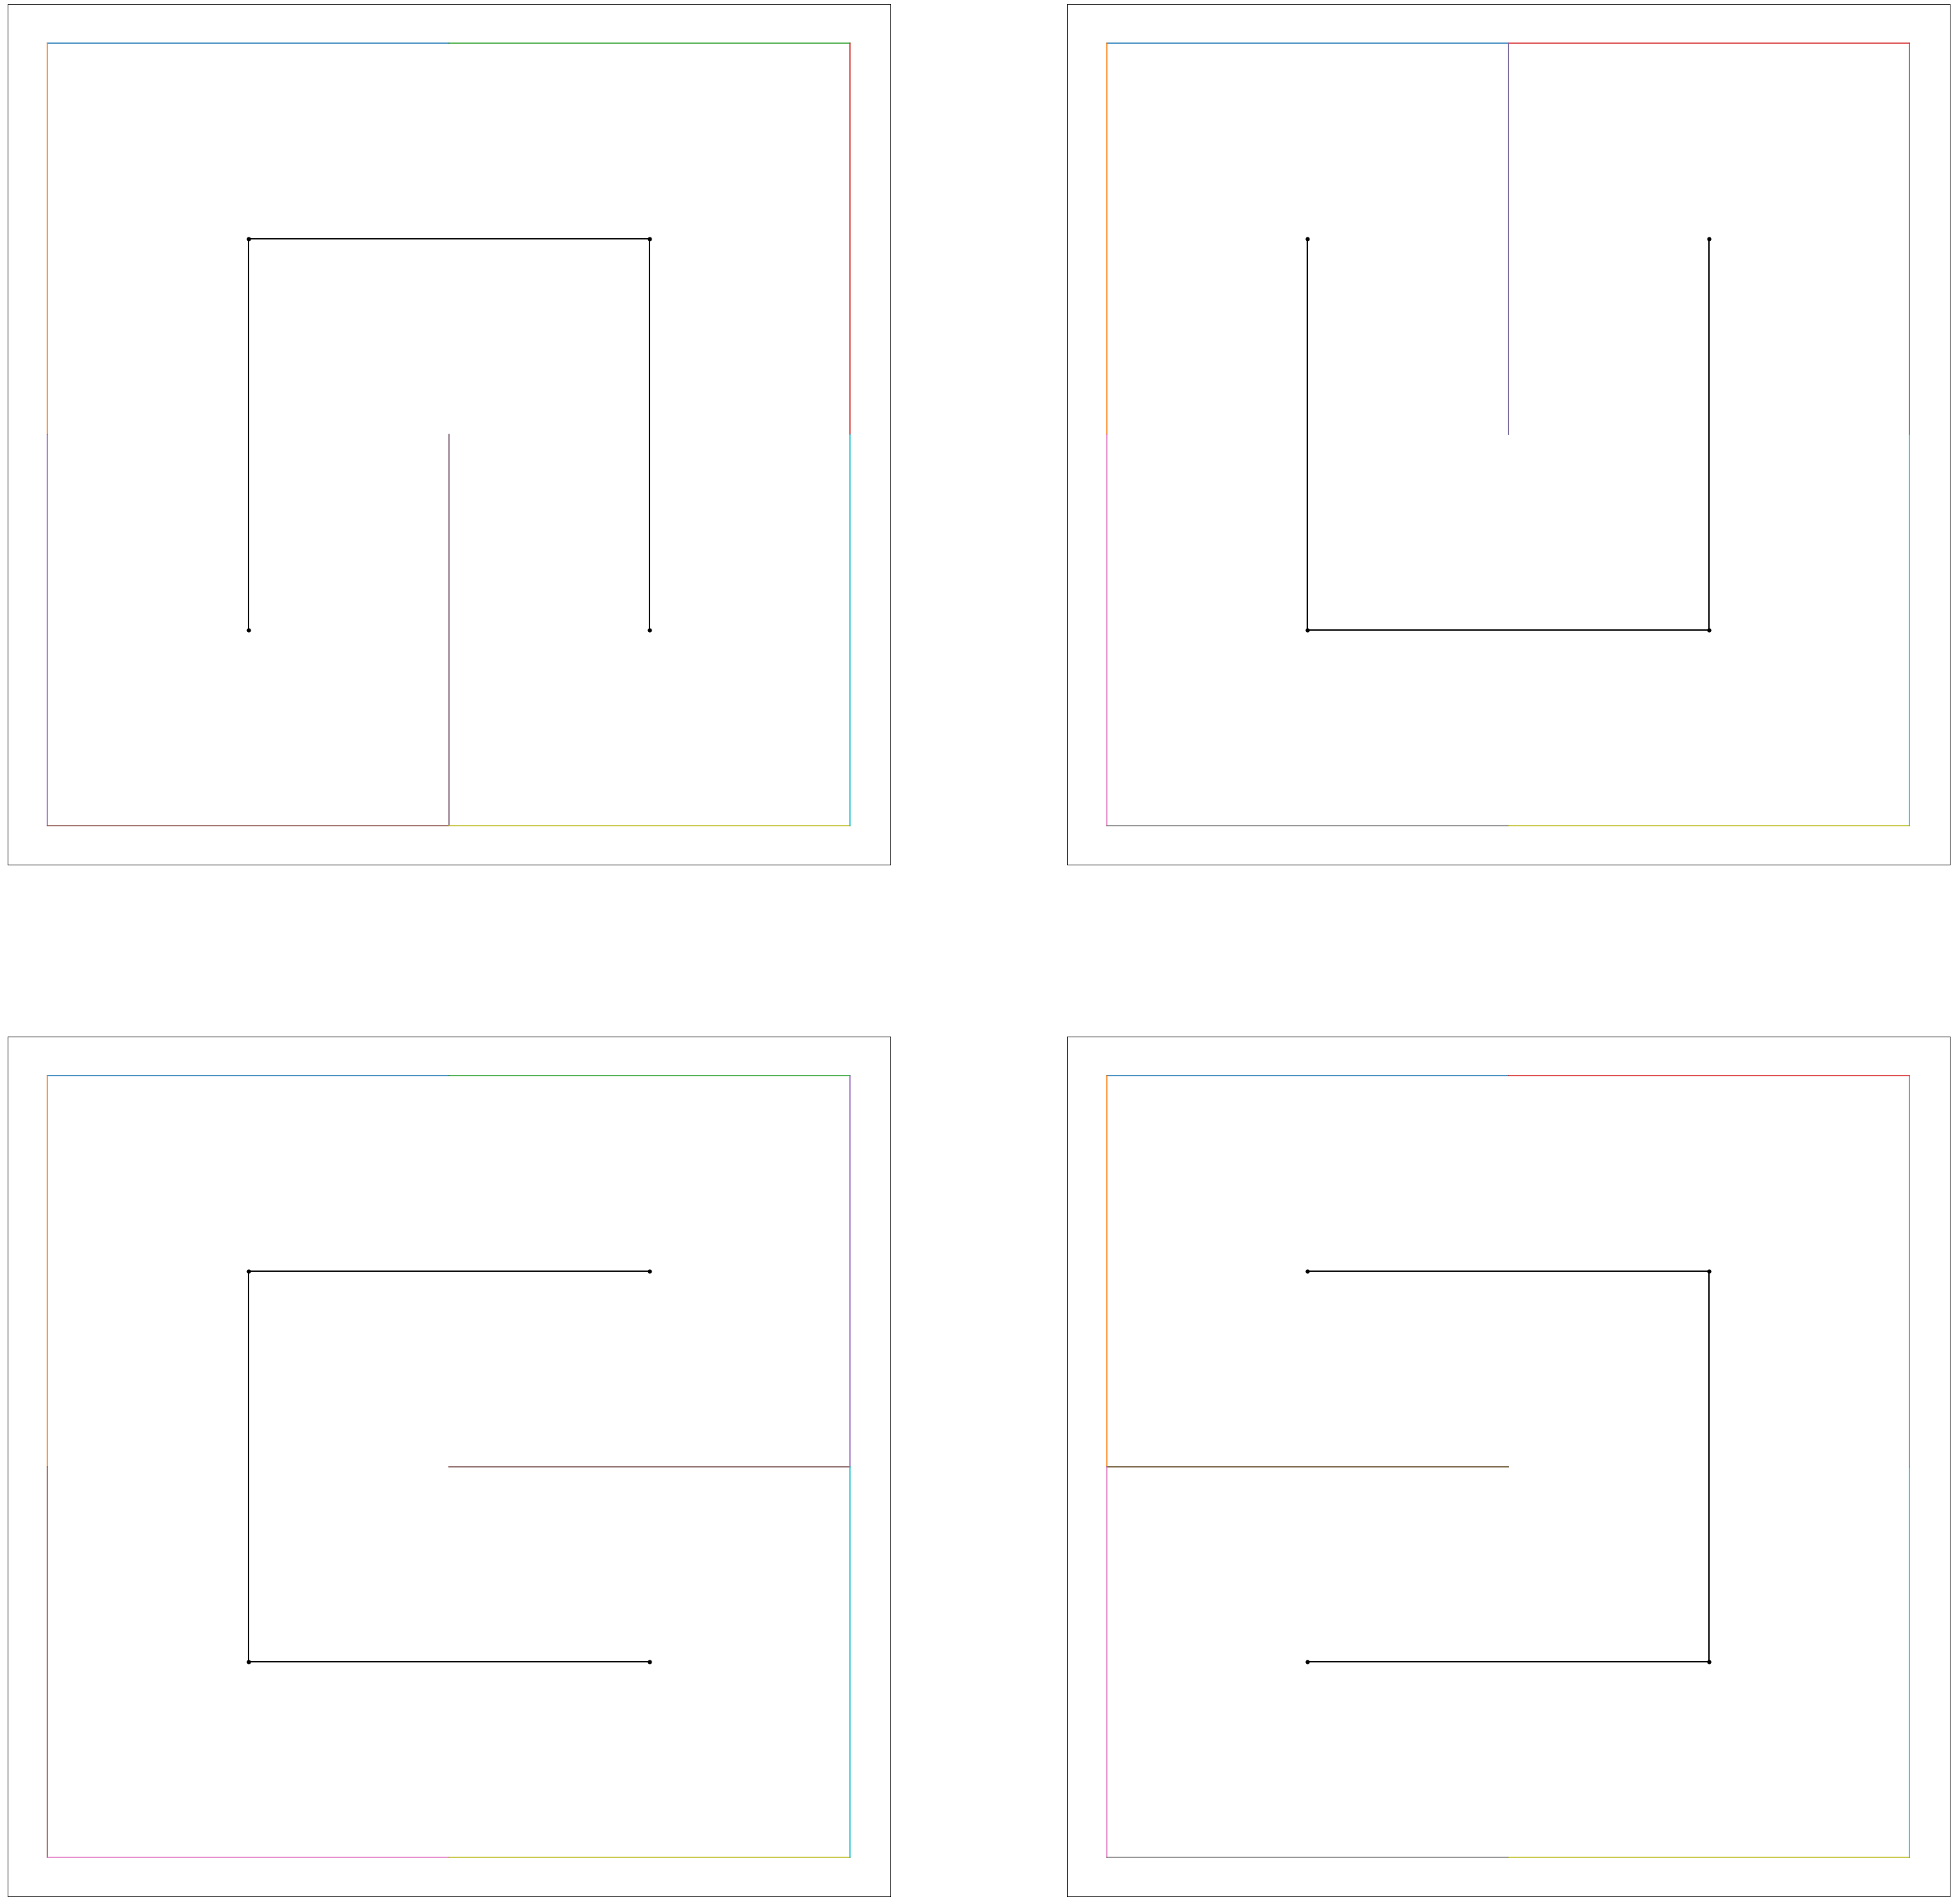

In [14]:
vL2x2 = treatment.generate_lab_bf(2,2)
cols = 2
rows = len(vL2x2)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(vL2x2)):
            break
        else:
            show_lab(axs[i,n], vL2x2[cols*i+n])
            show_graph(axs[i,n], vL2x2[cols*i+n])
            continue
        break
fig.savefig("data/docs/2x2true.png", dpi=200)
fig.show()

### Extraction des pseudo-labyrinthes contenant un mur

In [15]:
bon_nombre_de_murs = 1
presque_lab = []
for lab in L_2x2:
    if(treatment.nb_murs(lab) == 1):
        presque_lab.append(lab)

len(presque_lab)

4

C:\Users\User\AppData\Local\Temp\ipykernel_8572\355315979.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


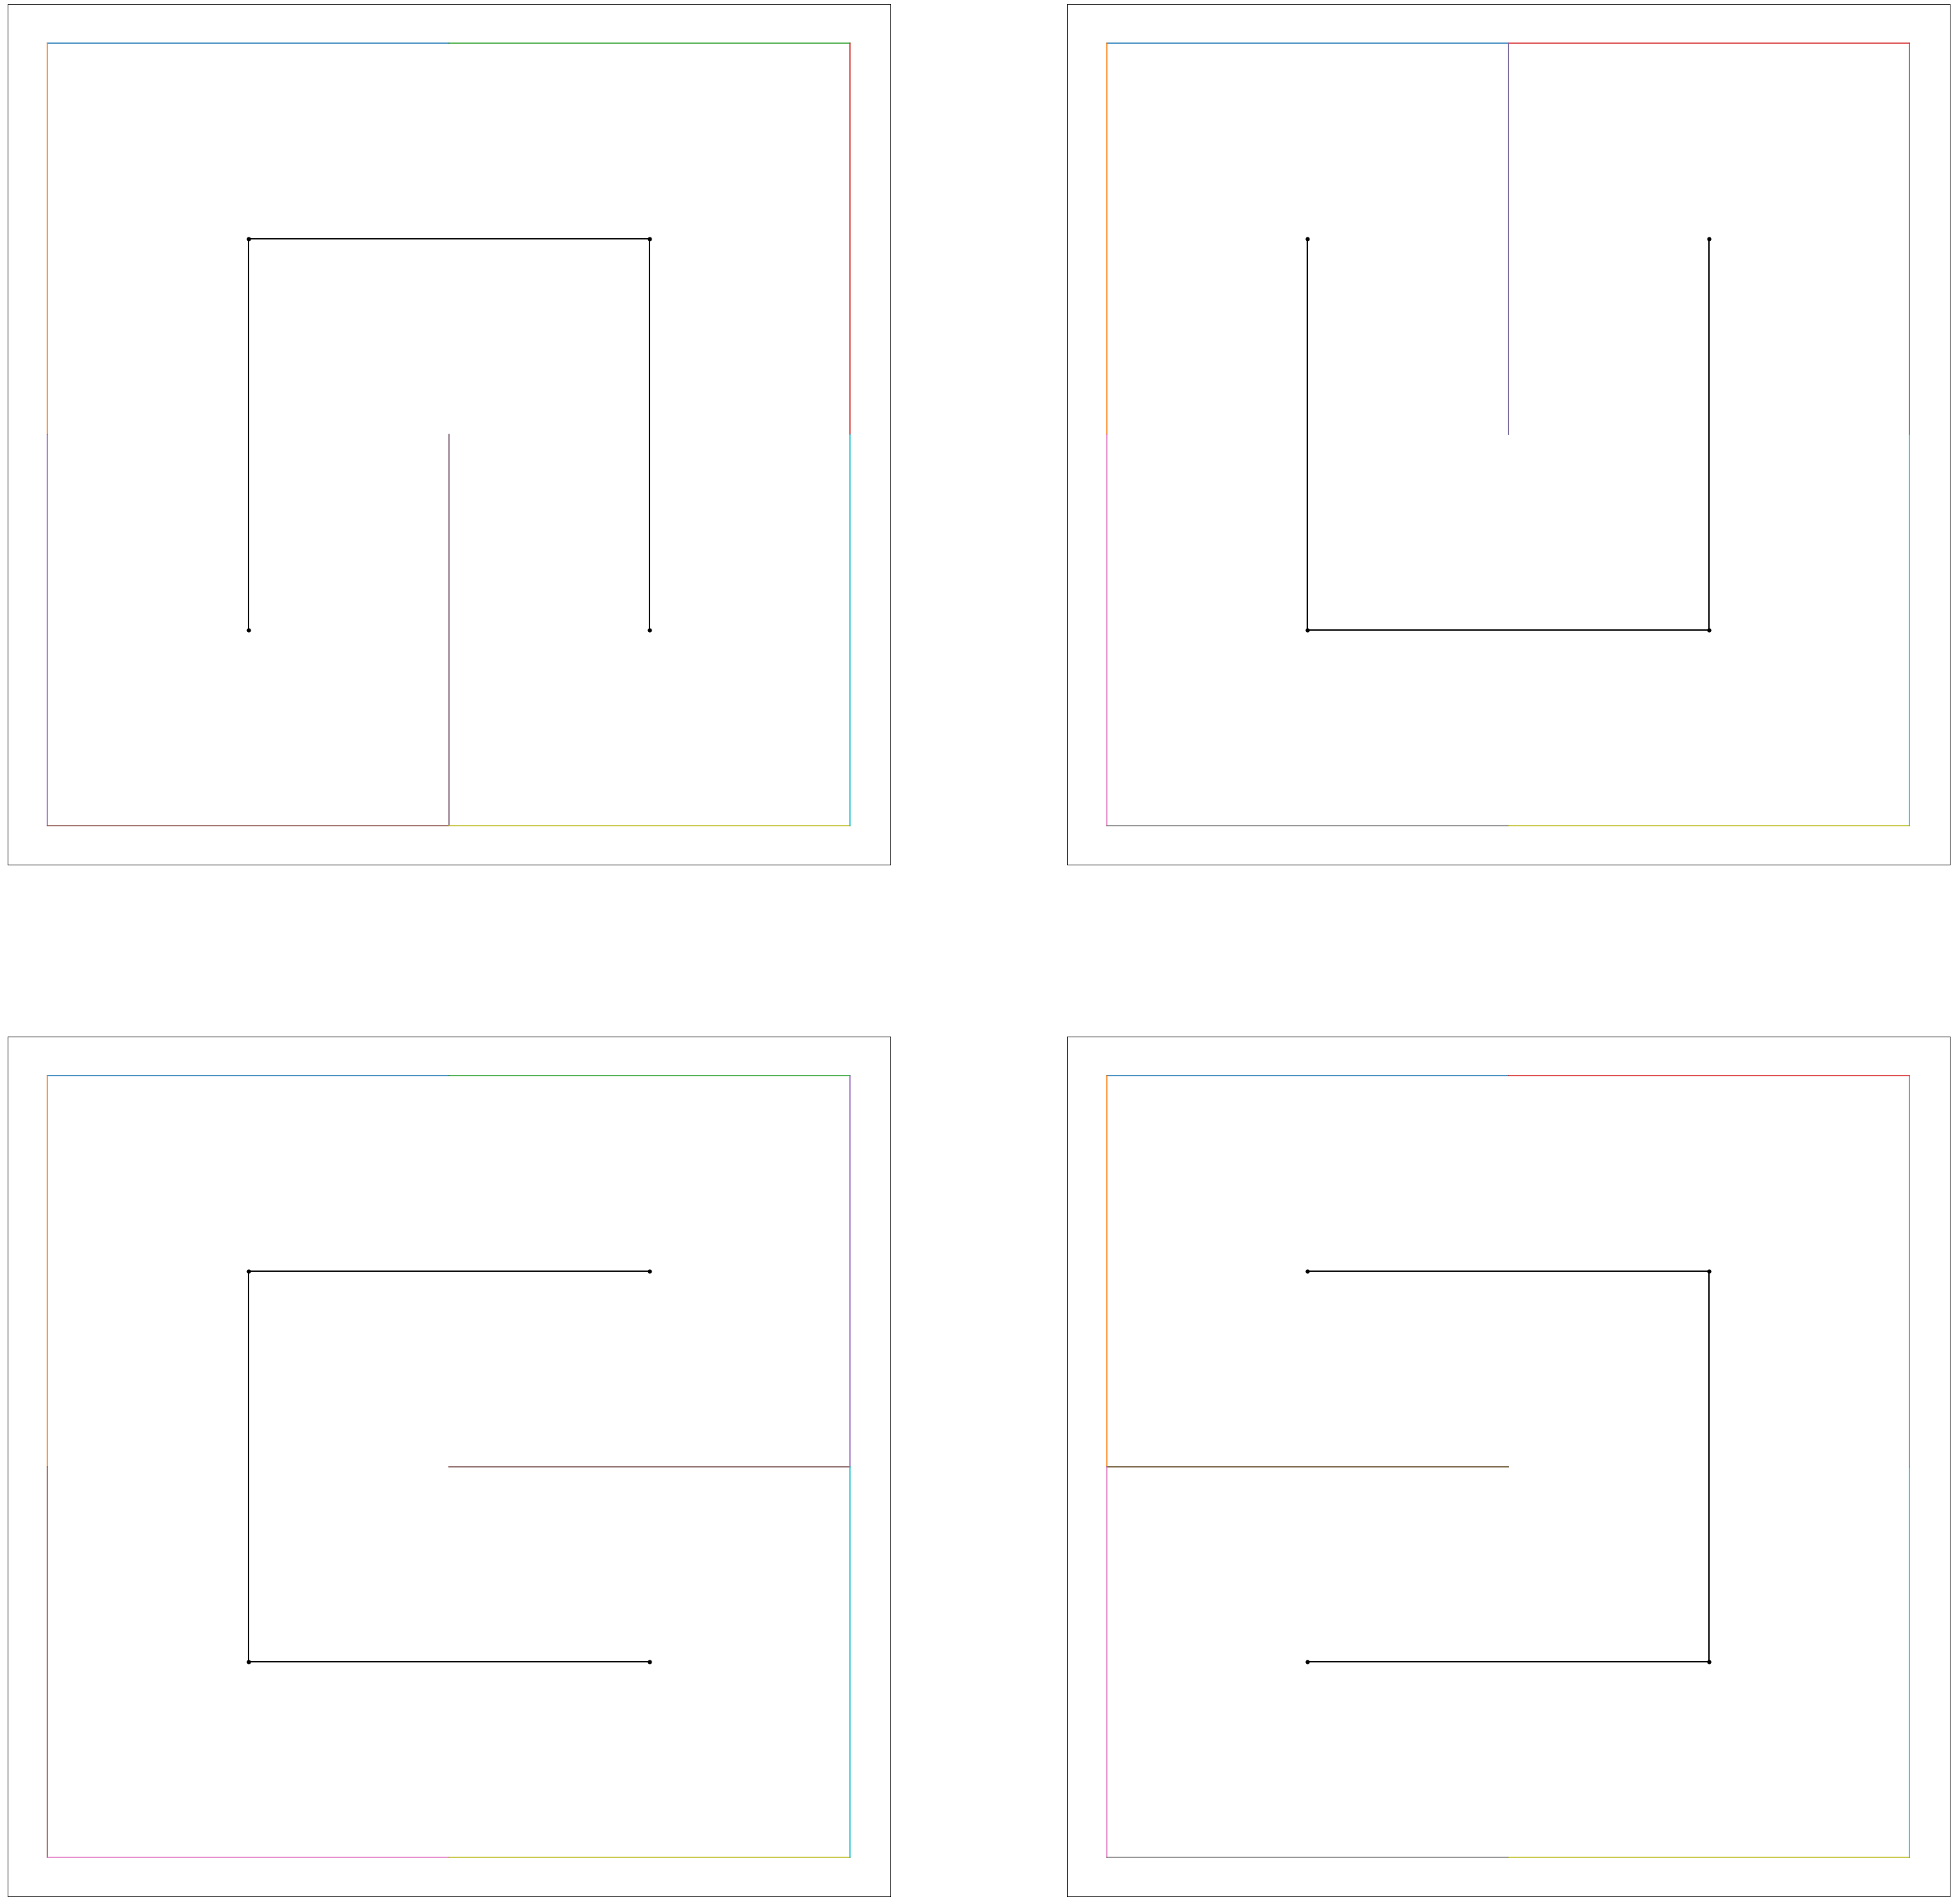

In [16]:
cols = 2
rows = len(presque_lab)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(presque_lab)):
            break
        else:
            show_lab(axs[i,n], presque_lab[cols*i+n])
            show_graph(axs[i,n], presque_lab[cols*i+n])
            continue
        break
fig.savefig("data/docs/2x2_bon_nb_murs.png", dpi=100)
fig.show()

## Cas du 3x2
### Pseudo-Labyrinthes

In [17]:
L_3x2 = treatment.generate_pseudo_lab(3,2)
L = L_3x2
print(len(L))
L[0]

128


{'ncolumns': 3,
 'nlines': 2,
 (0, 0): [(1, 0), (0, 1)],
 (0, 1): [(0, 0), (1, 1), (0, 2)],
 (0, 2): [(0, 1), (1, 2)],
 (1, 0): [(0, 0), (1, 1)],
 (1, 1): [(0, 1), (1, 0), (1, 2)],
 (1, 2): [(0, 2), (1, 1)]}

In [18]:
cols = 8
rows = len(L)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(L)):
            break
        else:
            show_lab(axs[i,n], L[cols*i+n])
            show_graph(axs[i,n], L[cols*i+n])
            continue
        break
fig.savefig("data/3x2/Total.png", dpi=150)
fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8572\2480984161.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Error in callback <function flush_figures at 0x000001DF99BDD8B0> (for post_execute):


KeyboardInterrupt: 


KeyboardInterrupt



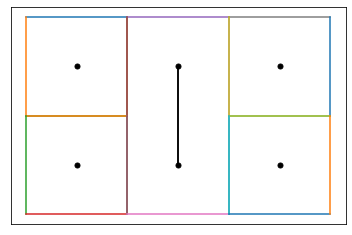

In [19]:
for i in range(len(L)):
    plt.clf()
    show_lab(plt,L[i])
    show_graph(plt, L[i])
    plt.xticks([])
    plt.yticks([])
    plt.savefig("data/3x2/{}.png".format(i))
plt.clf()

### Labyrinthes

In [ ]:
vL3x2 = treatment.generate_lab_bf(3,2)
cols = 3
rows = len(vL3x2)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(vL3x2)):
            break
        else:
            show_lab(axs[i,n], vL3x2[cols*i+n])
            show_graph(axs[i,n], vL3x2[cols*i+n])
            continue
        break
fig.savefig("data/docs/3x2true.png", dpi=200)
fig.show()

### Extraction des pseudo-labyrinthes contenant deux murs

In [ ]:
bon_nombre_de_murs = 2
presque_lab = []
for lab in L_3x2:
    if(treatment.nb_murs(lab) == 2):
        presque_lab.append(lab)

len(presque_lab)

In [ ]:
cols = 2
rows = len(presque_lab)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(presque_lab)):
            break
        else:
            show_lab(axs[i,n], presque_lab[cols*i+n])
            show_graph(axs[i,n], presque_lab[cols*i+n])
            continue
        break
fig.savefig("data/docs/3x2_bon_nb_murs.png", dpi=100)
fig.show()

## Illustration d'un 17x13

In [ ]:
j = treatment.empty_lab(17,13)
j = treatment.reverse_lab(j)
plt.xticks([])
plt.yticks([])
show_lab(plt,j)
show_graph(plt,j)
plt.savefig("data/docs/17x13_full.png", dpi=200)

In [ ]:
len(vL3x2)

In [ ]:
l2x4 = treatment.generate_lab_deadends(2,4)
len(l2x4)

In [ ]:
l3x3 = treatment.generate_lab_deadends(3,3)
len(l3x3)

In [ ]:
l2x5 = treatment.generate_lab_deadends(2,5)
len(l2x5)

In [ ]:
%%time
l2x6 = treatment.generate_lab_deadends(2,6)
len(l2x6)

In [ ]:
%%time
l3x4 = treatment.generate_lab_deadends(3,4)
len(l3x4)

|                 |        1        |        2        |        3        |        4        |
| :-------------: | :-------------: | :-------------: | :-------------: | :-------------: |
|      **1**      |        1        |        1        |        1        |        1        |
|      **2**      |        1        |        4        |       15        |       56        |
|      **3**      |        1        |       15        |       192       |      2415       |
|      **4**      |        1        |       56        |      2415       |     100352      |

In [ ]:
treatment.kirchhoff(4, 4)

In [ ]:
treatment.laplace(3, 2)

In [ ]:
treatment.laplace(2, 3)

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import treatment
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<module 'matplotlib.pyplot' from 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

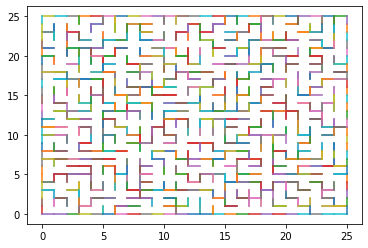

In [26]:
lab = treatment.wilson_generation(25, 25)
show_lab(plt, lab)
#show_graph(plt, lab)

In [27]:
l2x3 = treatment.generate_lab_deadends(2,3)
occurences = [0 for _ in range(len(l2x3))]
for _ in range(100000):
    lab = treatment.wilson_generation(2, 3)
    for i in range(len(l2x3)):
        if treatment.lab_equality(lab, l2x3[i]):
            occurences[i]+=1
        if not all(not treatment.lab_equality(lab, lab2x3) for lab2x3 in l2x3):
            print("hmm")
print(occurences)

[6495, 6613, 6623, 6748, 6855, 6712, 6624, 6611, 6656, 6815, 6580, 6735, 6629, 6649, 6655]
